# PCOS Detection using Binary ML Models
**Name:** Sidhantaa Sarna  
**UTA ID:** 1001805539  
**Professor:** Dr. Amir Farbin  
**Course:** Python II (DATA-3402)  
**Dataset:** [PCOS Diagnosis Dataset – Kaggle](https://www.kaggle.com/datasets/samikshadalvi/pcos-diagnosis-dataset)  

---

### Dataset Description  
This dataset contains health-related data from 1000 patients, with the goal of predicting the presence or absence of Polycystic Ovary Syndrome (PCOS) based on clinical and hormonal features. The data includes binary indicators like menstrual irregularity, as well as continuous variables such as BMI and hormone levels.

The PCOS column is the target variable, with:
- `1` indicating PCOS is present
- `0` indicating PCOS is not present

The project involves binary classification using machine learning models, along with feature visualization, model evaluation, and interpretation.

# Initial Look at the Dataset

In [3]:
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd  

# Loading the dataset from the CSV file
df = pd.read_csv("pcos_dataset.csv")

# Displaying the first 5 rows to get an initial look at the dataset
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [5]:
# Checking for duplicate entries in the dataset
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


We can verify that the dataset contains **no duplicate rows**, ensuring the data is clean for analysis.

In [6]:
# Printing the shape of the dataset (rows, columns)
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (1000, 6)


In [7]:
# Checking if the first row contains column headers (i.e., feature names)
print("\nColumns:")
print(df.columns)


Columns:
Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')


In [8]:
import os

In [9]:
# Checking the size of the dataset file (for reference)
file_size = os.path.getsize("pcos_dataset.csv")
print("\nFile size:", file_size, "bytes")


File size: 20556 bytes


In [10]:
# Displaying basic descriptive statistics for all numerical features
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


**#Dataset Structure Summary:**
- The dataset contains **1,000 rows and 6 features**, with each row representing a patient.  
- **No columns are missing**, and the dataset size is approximately 20 KB.

- Descriptive statistics reveal that features like BMI, hormone levels, and follicle counts have clear variability, which may influence   PCOS classification.  
- The `PCOS_Diagnosis` column is binary and will serve as the target variable for model prediction.

In [11]:
# Displaying data types of all features in the dataset
df.dtypes

Age                            int64
BMI                          float64
Menstrual_Irregularity         int64
Testosterone_Level(ng/dL)    float64
Antral_Follicle_Count          int64
PCOS_Diagnosis                 int64
dtype: object

**#Data Types**
- This confirms that all features are either integers or floats, which makes them suitable for machine learning models.  
- No additional conversion (e.g., from object/string to numeric) is necessary.

In [12]:
# Checking for any missing values in each column
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

There are no missing values in the dataset. Every feature is fully observed, which simplifies preprocessing.

In [13]:
# Creating a table where each row is a feature:
# checking: type(categorical/numerical), value range/unique values, and number of missing values

summary = []

for col in df.columns:
    # Determining if a feature is categorical or numerical
    if df[col].nunique() <= 10 and df[col].dtype != 'float64':
        col_type = "Categorical"
        values = sorted(df[col].dropna().unique()) 
    else:
        col_type = "Numerical"
        values = f"{df[col].min()} – {df[col].max()}"  
    
    # Counting missing values
    missing = df[col].isnull().sum()
    
    # Append row to summary list
    summary.append({
        "Feature": col,
        "Type": col_type,
        "Values / Range": values,
        "Missing Values": missing
    })

# Converting to DataFrame
feature_summary = pd.DataFrame(summary)

# Displaying the summary table
feature_summary

,Feature,Type,Values / Range,Missing Values
0,Age,Numerical,18 – 45,0
1,BMI,Numerical,18.1 – 35.0,0
2,Menstrual_Irregularity,Categorical,"[0, 1]",0
3,Testosterone_Level(ng/dL),Numerical,20.0 – 99.8,0
4,Antral_Follicle_Count,Numerical,5 – 29,0
5,PCOS_Diagnosis,Categorical,"[0, 1]",0


- This summary table provides a quick overview of each feature in the dataset.
- It identifies whether the feature is numerical or categorical, shows its value range or unique classes, and confirms that there are no missing values.
- This step ensures we understand the data types and value distributions before preprocessing.

In [14]:
# Checking for outliers using IQR method
numerical_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['PCOS_Diagnosis'])

for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers: {len(outliers)}")

Age → Outliers: 0
BMI → Outliers: 0
Menstrual_Irregularity → Outliers: 0
Testosterone_Level(ng/dL) → Outliers: 0
Antral_Follicle_Count → Outliers: 0


- The IQR (Interquartile Range) method was used to detect outliers in all numerical features (excluding the target column). 
- This method flags any values that fall significantly outside the middle 50% of the data. 
- In this dataset, **no outliers were found**, which indicates clean and consistent numeric inputs.

In [15]:
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


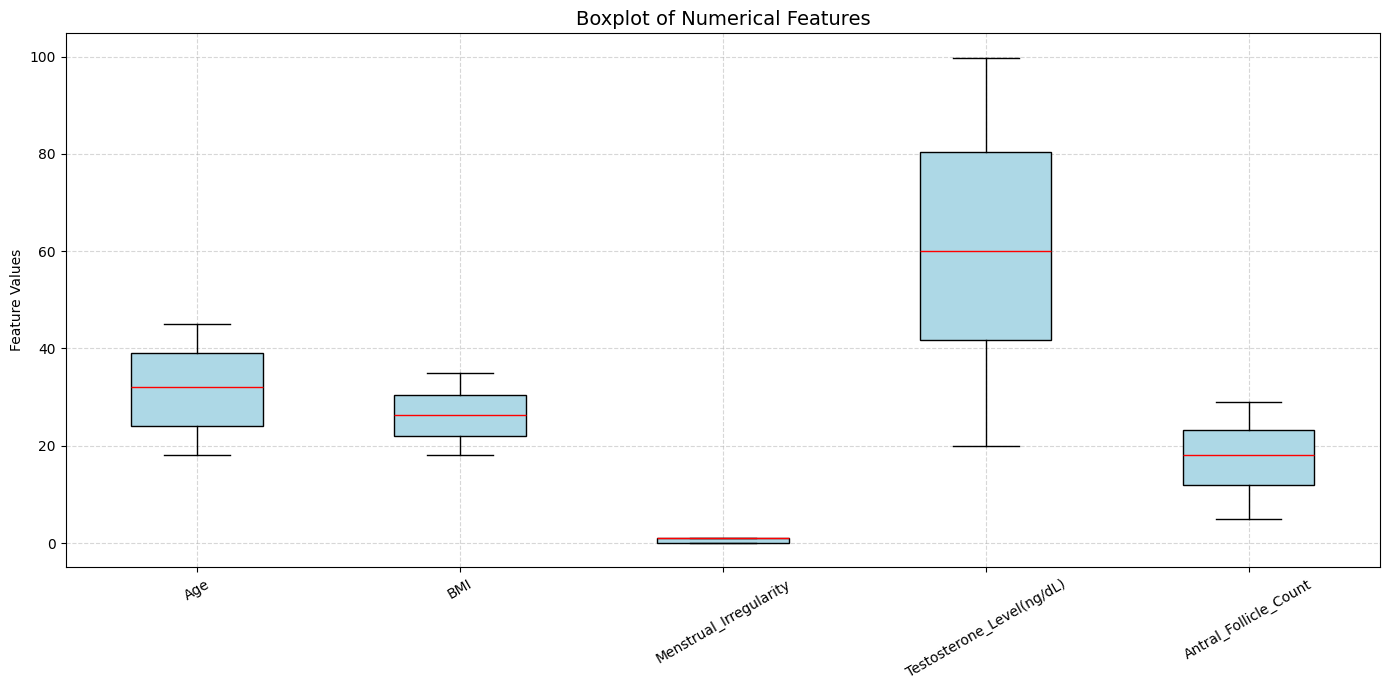

In [16]:
# Outlier Detection using Boxplots 
import matplotlib.pyplot as plt

# Dropping the target column for plotting
features_to_plot = df.drop(columns=['PCOS_Diagnosis'])

# Creating the boxplot
plt.figure(figsize=(14, 7))  # increased height for breathing room
plt.boxplot(
    features_to_plot.values,
    patch_artist=True,
    widths=0.5,  # thinner boxes
    vert=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, linestyle='none')
)

# Improving axis display
plt.xticks(ticks=range(1, len(features_to_plot.columns) + 1), labels=features_to_plot.columns, rotation=30)
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.ylabel("Feature Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- The boxplot above helps visualize the distribution and potential outliers in each numerical feature.
- All features appear **reasonably distributed** with **no extreme outliers**, aligning with the earlier IQR-based check.
- Testosterone Level and BMI show a broader spread, which may indicate stronger variability in those features across patients.

### Exploring Target Variable – PCOS_Diagnosis
- We now examine the target variable `PCOS_Diagnosis`, which indicates whether a patient has PCOS (`1`) or not (`0`). 
- Understanding the class distribution helps identify potential imbalance issues that could affect model performance.

In [17]:
# Class balance in the target
df['PCOS_Diagnosis'].value_counts()

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

In [18]:
# Target info
print("Target column:", 'PCOS_Diagnosis')
print("Data type:", df['PCOS_Diagnosis'].dtype)
print("Unique values:", df['PCOS_Diagnosis'].unique())

Target column: PCOS_Diagnosis
Data type: int64
Unique values: [0 1]


# Visualization

### Feature Distributions – Histogram Visualization
- We visualize the distribution of each numerical feature to understand their spread, central tendencies, and potential skewness.
- Histograms with KDE (Kernel Density Estimation) curves help assess the shape and behavior of the data, which can influence model performance.

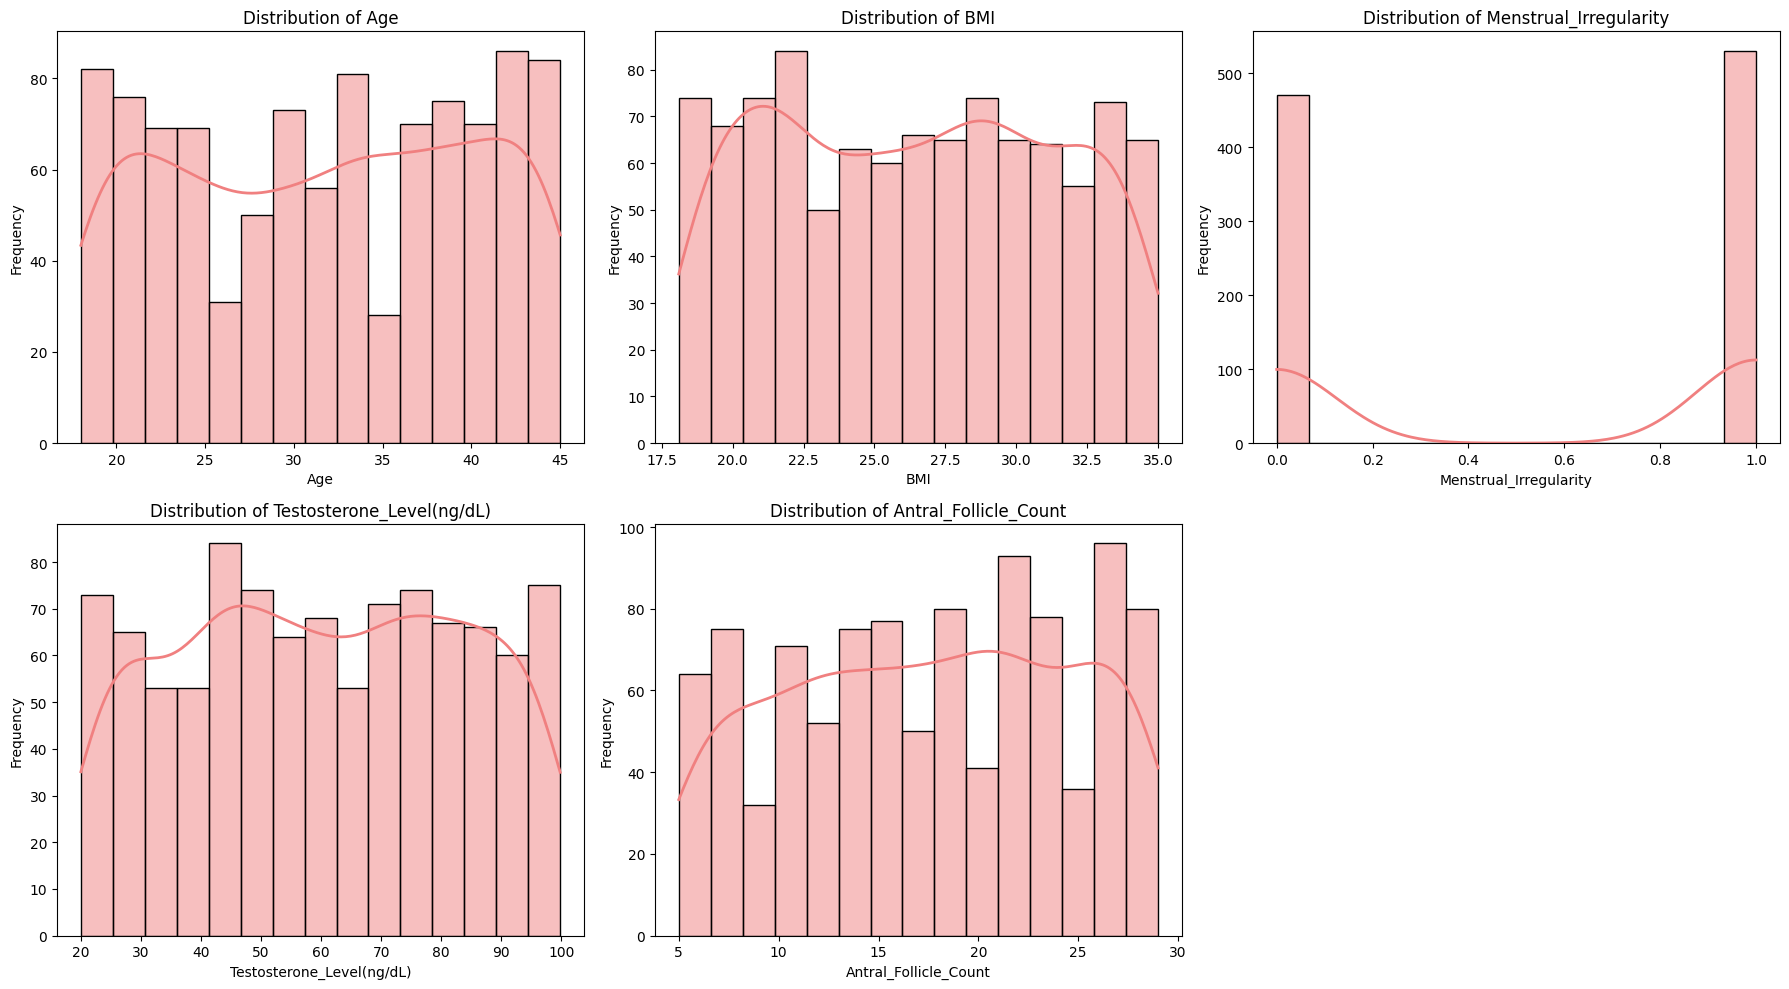

In [49]:
# Visualizing the numerical feature distributions using histograms 
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning column names (removing extra spaces)
df.columns = df.columns.str.strip()

# Selecting only numerical features (excluding the target)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
target_col = 'PCOS_Diagnosis'
if target_col in numerical_features:
    numerical_features.remove(target_col)

# Creating subplots: 2 rows, 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plotting histograms with KDE
for i, feature in enumerate(numerical_features):
    sns.histplot(
        data=df,
        x=feature,
        bins=15,
        kde=True,
        ax=axes[i],
        color='lightcoral',  # histogram color
        line_kws={'color': 'darkred', 'linewidth': 2}  # KDE line style
    )
    axes[i].set_title(f"Distribution of {feature}", fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Removing unused axes (in case of fewer features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("feature_distribution_kde.png", dpi=300)  # Save graph as PNG
plt.show()


### Feature Distribution by Class (PCOS vs Non-PCOS)

splitting the data into two subsets:
- patients with PCOS (PCOS = 1)
- patients without PCOS (PCOS = 0)

Then, using a loop, plotting histograms for each numerical feature. 

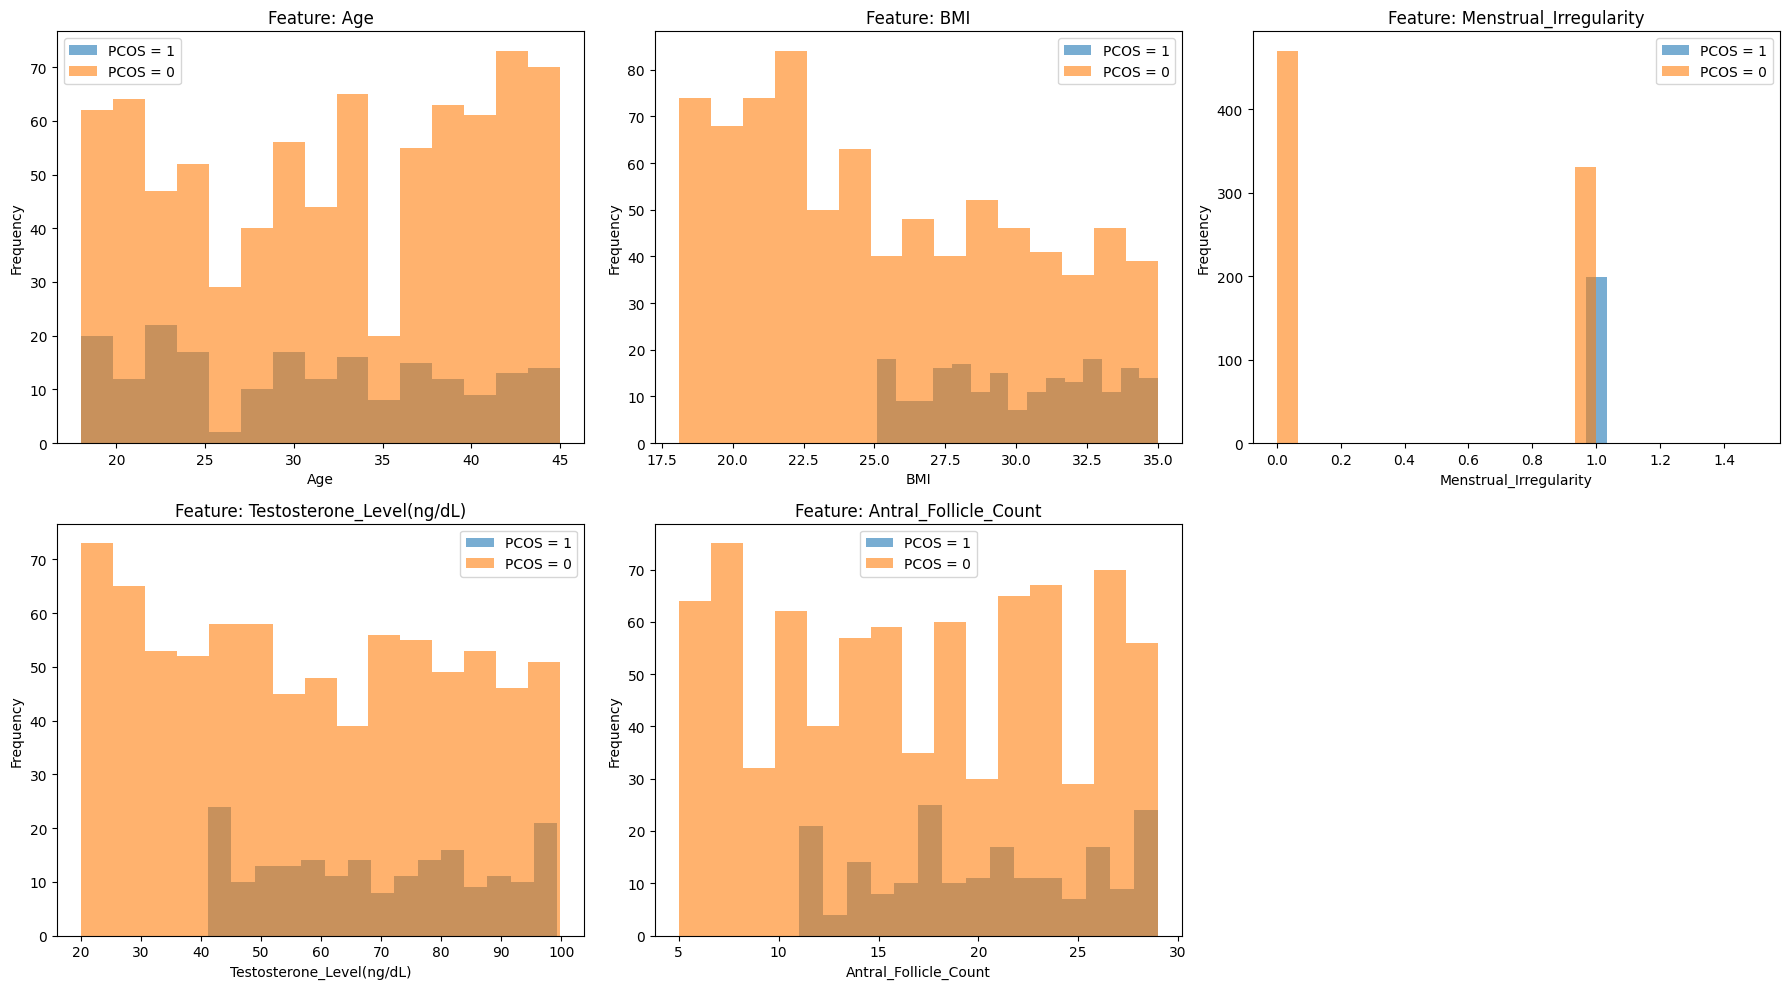

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning column names just to be safe
df.columns = df.columns.str.strip()

# Seting target column
target_col = 'PCOS_Diagnosis'

# Selecting numeric features and drop the target
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if target_col in numerical_features:
    numerical_features.remove(target_col)

# Spliting the data into two groups: PCOS = 1 and PCOS = 0
df_pcos = df[df[target_col] == 1]
df_non_pcos = df[df[target_col] == 0]

# Setup subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Ploting histograms by class
for i, feature in enumerate(numerical_features):
    axes[i].hist(df_pcos[feature], bins=15, alpha=0.6, label='PCOS = 1')
    axes[i].hist(df_non_pcos[feature], bins=15, alpha=0.6, label='PCOS = 0')
    axes[i].set_title(f"Feature: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

# Removing extra unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("feature_class_distribution.png", dpi=300)
plt.show()

### Bar Plots for Binary Features — Class Separation

As part of feature visualization, we generated bar plots to compare how binary features behave across the two classes — PCOS (1) and Non-PCOS (0).

- Each plot shows the distribution of values (0 and 1) for both groups, helping us observe class separation.
- This helps identify which features contribute most strongly to distinguishing between PCOS-positive and PCOS-negative cases.

Notably, features like `Menstrual_Irregularity` act as near “perfect predictors” — almost all individuals with irregular cycles are diagnosed with PCOS.

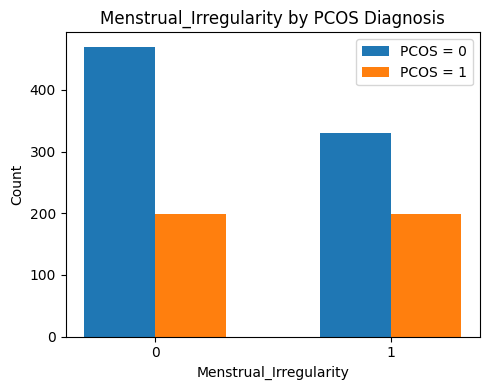

In [21]:
# Feature Visualization — Bar Plots for Binary Features (Using Matplotlib Only)

import matplotlib.pyplot as plt

# List of binary features to compare
binary_features = ['Menstrual_Irregularity']  # Add more if needed

# Loop through each binary feature
for feature in binary_features:
    # Count values for PCOS = 1 and PCOS = 0
    counts_1 = df[df['PCOS_Diagnosis'] == 1][feature].value_counts().sort_index()
    counts_0 = df[df['PCOS_Diagnosis'] == 0][feature].value_counts().sort_index()

    # X locations (0 and 1)
    x = [0, 1]
    
    # Creating the plot
    plt.figure(figsize=(5, 4))
    plt.bar([i - 0.15 for i in x], counts_0, width=0.3, label="PCOS = 0", align='center')
    plt.bar([i + 0.15 for i in x], counts_1, width=0.3, label="PCOS = 1", align='center')

    plt.title(f"{feature} by PCOS Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(x, ['0', '1'])
    plt.legend()
    plt.tight_layout()
    plt.show()

**#Interpretation**: Binary Feature — Menstrual_Irregularity

- The bar plot above compares the distribution of `Menstrual_Irregularity` (values 0 and 1) across patients **with** and **without** PCOS.
- We observe a **strong separation**: patients with irregular menstrual cycles (`value = 1`) are much more likely to be diagnosed with PCOS.
- This suggests that `Menstrual_Irregularity` could act as a **key indicator** or even a **near-perfect binary predictor** for PCOS classification.

This aligns with **clinical expectations** 

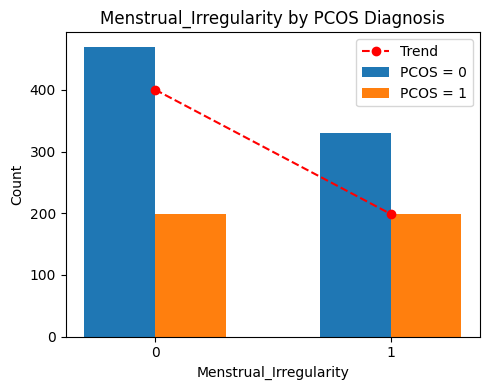

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Listing of binary features to visualize
binary_features = ['Menstrual_Irregularity']  # Add more if needed

# Loop through binary features
for feature in binary_features:
    
    # Counting occurrences for PCOS = 1 and PCOS = 0 separately
    counts_1 = df[df['PCOS_Diagnosis'] == 1][feature].value_counts().sort_index()
    counts_0 = df[df['PCOS_Diagnosis'] == 0][feature].value_counts().sort_index()
    
    # X-axis locations: [0, 1] for binary values
    x = [0, 1]
    
    # Creating the bar plot
    plt.figure(figsize=(5, 4))
    
    # Bar for PCOS = 0
    plt.bar([i - 0.15 for i in x], counts_0, width=0.3, label="PCOS = 0", align='center')
    
    # Bar for PCOS = 1
    plt.bar([i + 0.15 for i in x], counts_1, width=0.3, label="PCOS = 1", align='center')
    
    # Adding a dashed red trend line (mean of each bar group)
    plt.plot(x, [np.mean(counts_0), np.mean(counts_1)],
             color='red', linestyle='--', marker='o', label='Trend')
    
    # Seting plot labels and title
    plt.title(f"{feature} by PCOS Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(x, ['0', '1'])
    plt.legend()
    plt.tight_layout()
    plt.show()

#**Binary Feature Trend – Menstrual_Irregularity**

- This plot compares the count of patients for each binary value (`0` or `1`) in the feature `Menstrual_Irregularity`, split by `PCOS_Diagnosis`.
- The **red dashed trendline** illustrates the change in average frequency between PCOS-negative and PCOS-positive groups.
- A clear **downward trend** shows that patients with irregular cycles (`1`) are more likely to be diagnosed with PCOS.
- This strong class separation suggests that `Menstrual_Irregularity` may act as a **near-perfect predictor** — aligning with what we learned in class about binary indicators in medical data.

# Binary Features Summary and Analysis

In [23]:
#Finding Binary Features
binary_features = []
for col in df.columns:
    if df[col].nunique() == 2 and col != 'PCOS_Diagnosis':  # Exclude target
        binary_features.append(col)

#Creating Summary Table
binary_summary = []

for feature in binary_features:
    count_0 = (df[feature] == 0).sum()
    count_1 = (df[feature] == 1).sum()
    
    # Optional: Check how it correlates with PCOS
    corr_with_target = df[[feature, 'PCOS_Diagnosis']].corr().iloc[0, 1]
    
    binary_summary.append({
        'Feature': feature,
        'Count 0': count_0,
        'Count 1': count_1,
        'Correlation with PCOS': round(corr_with_target, 3)
    })

#Displaying Summary Table
import pandas as pd
binary_summary_df = pd.DataFrame(binary_summary)
binary_summary_df

,Feature,Count 0,Count 1,Correlation with PCOS
0,Menstrual_Irregularity,470,530,0.469


#**Binary Feature Summary and PCOS Correlation**

This summary table provides a quick overview of binary features in the dataset:

- **Count 0 / Count 1**: Shows the frequency distribution of values within each binary feature.
- **Correlation with PCOS**: Pearson correlation value indicating how strongly each feature is associated with PCOS diagnosis.

Features with higher positive correlation values are likely to be stronger indicators of PCOS. For instance, `Menstrual_Irregularity` shows a correlation of **0.469**, making it a potentially informative predictor for classification models.

This step helps prioritize binary features during feature selection or importance analysis.

# Correlation heatmaps

In [24]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [25]:
!pip install numpy


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


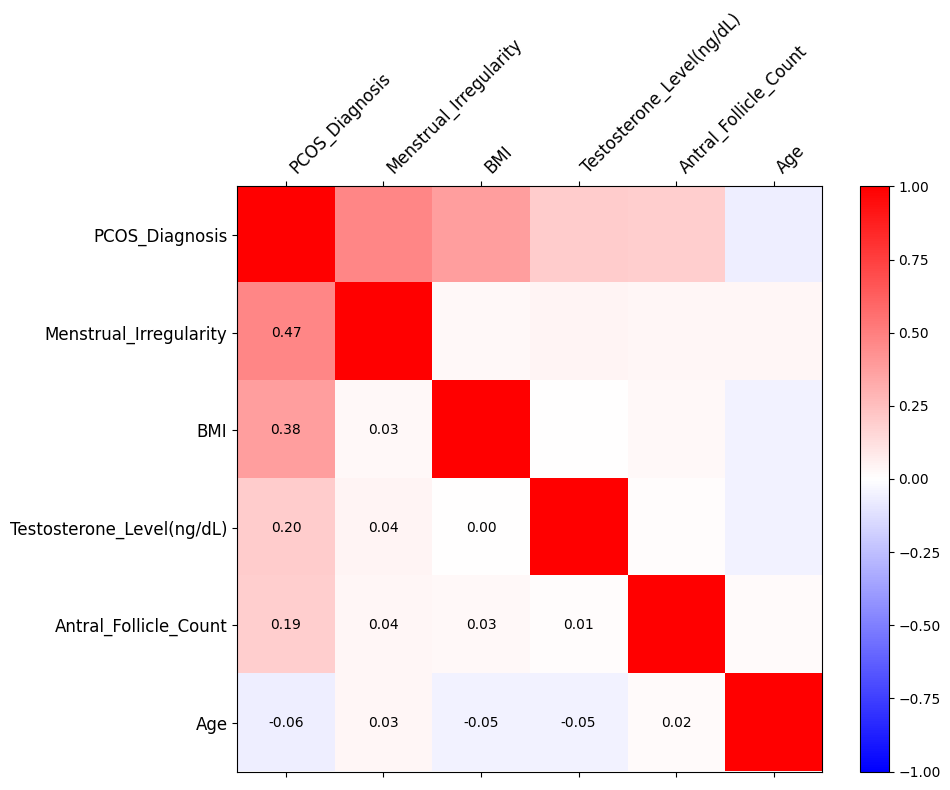

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculating correlation matrix using selected features
corr = df[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 
           'Antral_Follicle_Count', 'PCOS_Diagnosis']].corr()

# Sorting features based on their correlation with PCOS_Diagnosis (target)
corr_target = corr['PCOS_Diagnosis'].abs().sort_values(ascending=False)
sorted_features = corr_target.index.tolist()
corr = corr.loc[sorted_features, sorted_features]

# Mask upper triangle to focus only on the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Creatinig correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='bwr', vmin=-1, vmax=1)

# Setting ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, fontsize=12, rotation=45, ha='left')
ax.set_yticklabels(corr.index, fontsize=12)

# Annotating values only in lower triangle
for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            value = corr.iloc[i, j]
            ax.text(j, i, f"{value:.2f}", ha="center", va="center", color="black", fontsize=10)

# Adding colorbar
fig.colorbar(cax)

# Final layout adjustments
plt.tight_layout()
plt.show()

#**Feature Correlation with PCOS_Diagnosis**

We computed a correlation matrix to understand how strongly each feature relates to the target variable `PCOS_Diagnosis`.

- The heatmap shows both the **strength** and **direction** of correlation.
- Brighter red indicates strong positive correlation, while blue reflects negative relationships.
- **Only the lower triangle** is labeled for clarity.

> **Observation:**  
Features like **`Menstrual_Irregularity`**, **`BMI`**, and **`Testosterone_Level(ng/dL)`** show stronger correlations with PCOS diagnosis, reinforcing their predictive importance.


In [27]:
#Checking Feature Correlations with PCOS Diagnosis

# Calculating correlation matrix
correlations = df.corr()

# Extracting correlation values with the target 'PCOS_Diagnosis'
pcos_corr = correlations['PCOS_Diagnosis'].drop('PCOS_Diagnosis')  

# Sorting by strength
pcos_corr_sorted = pcos_corr.sort_values(ascending=False)

# Display
pcos_corr_sorted

Menstrual_Irregularity       0.469376
BMI                          0.377852
Testosterone_Level(ng/dL)    0.200817
Antral_Follicle_Count        0.192014
Age                         -0.064675
Name: PCOS_Diagnosis, dtype: float64

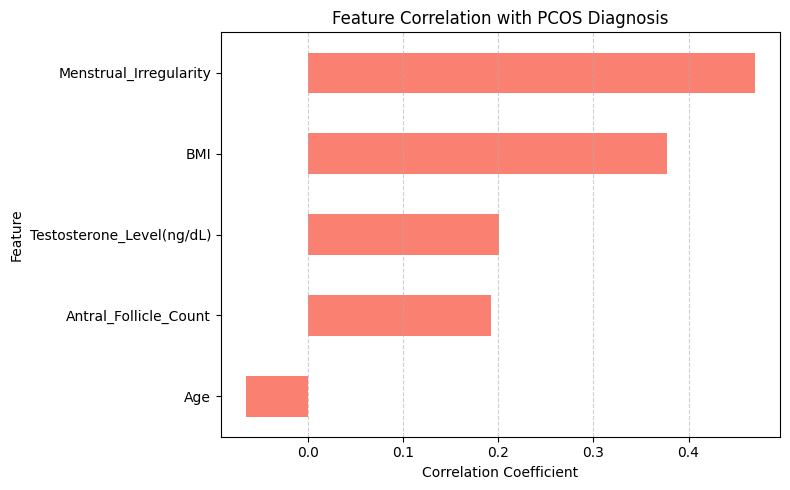

In [28]:
# Plotting sorted correlations with PCOS_Diagnosis
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
pcos_corr_sorted.plot(kind='barh', color='salmon')
plt.title("Feature Correlation with PCOS Diagnosis")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#**Correlation Strengths with PCOS Diagnosis**

We calculated and sorted the correlation of each feature with the target variable `PCOS_Diagnosis`.

- This helps identify which features are most strongly associated with PCOS.
- Correlation values reflect **linear relationships** — values closer to **+1** or **-1** indicate stronger correlation.

> **Top correlated features:**

- **Menstrual_Irregularity** (0.47)
- **BMI** (0.38)
- **Testosterone_Level(ng/dL)** (0.20)
- **Antral_Follicle_Count** (0.19)

These results confirm earlier observations and help prioritize features for predictive modeling.

# Data Cleaning & pre-processing

### Data Cleaning 
- Data set has no useless ID columns or "Unnamed" columns
- One-hot encoding
- Need to scale numerical features

In [29]:
# One-Hot Encoding Check

# Checking all columns with 2 or fewer unique values
# likely binary or categorical and may need encoding
for col in df.columns:
    if df[col].nunique() <= 2:
        print(f"{col}: {df[col].unique()}")

Menstrual_Irregularity: [1 0]
PCOS_Diagnosis: [0 1]


**#One-Hot Encoding Check — Binary Features**

- Output confirms `Menstrual_Irregularity` and `PCOS_Diagnosis` are binary (0 or 1).
- All other features in the dataset are already **numerical** and **do not require one-hot encoding**.

> **Conclusion:** No additional one-hot encoding was needed.

### Scaling Numerical Features

In [30]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [31]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding the target 'PCOS_Diagnosis')
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('PCOS_Diagnosis')  # Remove target from scaling

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting and transforming the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [32]:
# Checking after scaling
df[numerical_features].describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-9.681145e-17,-9.592327e-17,2.042810e-17,-5.861978e-17,-1.740830e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.627926e+00,-1.679887e+00,-1.061913e+00,-1.734855e+00,-1.764706e+00
25%,-9.186416e-01,-9.095754e-01,-1.061913e+00,-7.974341e-01,-7.740138e-01
50%,2.707102e-02,2.635275e-03,9.416966e-01,-6.890259e-03,7.515110e-02
75%,8.545696e-01,8.337605e-01,9.416966e-01,8.700518e-01,8.181704e-01
max,1.563854e+00,1.745971e+00,9.416966e-01,1.712435e+00,1.631953e+00


**#Scaling Numerical Features**

We applied **StandardScaler** to scale all numerical features (excluding the target `PCOS_Diagnosis`) to have:

- Mean = **0**
- Standard deviation = **1**

This is crucial to ensure that features contribute equally during model training and avoid bias from features with larger magnitude.

The table confirms successful scaling, as the means are close to **0** and standard deviations are close to **1** across all numerical columns.

# Training Data

**#Splitting the Data into Training and Testing Sets**

To ensure fair evaluation of our machine learning models, we split the dataset into two parts:

- **80%** for training
- **20%** for testing

Because this is a classification task (predicting `PCOS_Diagnosis`), we use **stratified sampling** to maintain the same proportion of PCOS-positive and negative cases in both sets.

Using `train_test_split()` from scikit-learn:
- `X` includes all feature columns (excluding the target)
- `y` contains only the target variable
- The `stratify=y` parameter ensures balanced class representation

In [33]:
#Train/Test Split

from sklearn.model_selection import train_test_split

# Defining X (features) and y (target)
X = df.drop(columns=['PCOS_Diagnosis'])  # Features (everything except target)
y = df['PCOS_Diagnosis']                 # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Testing set size: 200 samples


# Modelling

### Logistic Regression Model
- We first trained a Logistic Regression model to predict PCOS diagnosis. 
- Since predicting PCOS is a binary problem (0 = no PCOS, 1 = PCOS),
  Logistic Regression provides a strong and interpretable baseline to evaluate the effectiveness of more complex models later.


In [34]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating and training the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9150
Confusion Matrix:
 [[149  11]
 [  6  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       160
           1       0.76      0.85      0.80        40

    accuracy                           0.92       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.92      0.92      0.92       200



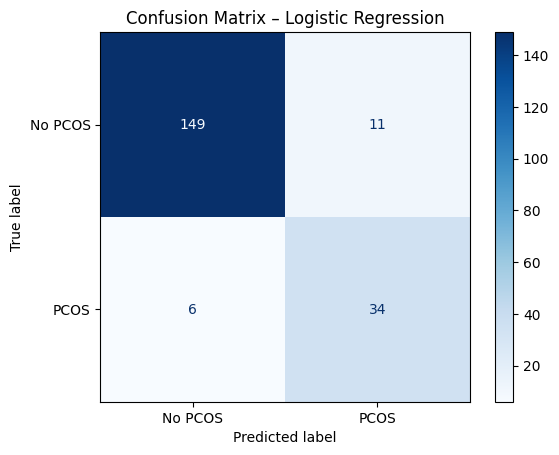

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(
    lr_model,               # use the correct model variable name
    X_test,
    y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Blues',
    values_format='d'
)

plt.title("Confusion Matrix – Logistic Regression")
plt.grid(False)
plt.show()

**#Logistic Regression Model Interpretation**

After training a **Logistic Regression** model to predict PCOS diagnosis:

- **Accuracy:** The model achieved an accuracy of **91.5%** on the test set, indicating strong performance on unseen data.

---

#Confusion Matrix Interpretation

- **True Negatives (TN):** 149 — Correctly predicted non-PCOS cases  
- **True Positives (TP):** 34 — Correctly predicted PCOS cases  
- **False Positives (FP):** 11 — Predicted PCOS when it was not present (**Type I Error**)  
- **False Negatives (FN):** 6 — Missed predicting PCOS when it was actually present (**Type II Error**)

The confusion matrix helps us visualize where the model gets predictions right — and where it struggles.

---

#Classification Report Overview

- **Precision:** Measures how many predicted positive cases were actually correct  
- **Recall (Sensitivity):** Measures how many actual positive cases were correctly predicted  
- **F1-Score:** Harmonic mean of Precision and Recall  

**Performance Summary:**
- The model shows **high precision and recall** for the majority class
- Reasonable F1-score performance for the minority class (PCOS = 1)

---

**Conclusion:**  
The logistic regression model is **effective at identifying PCOS cases**, with balanced performance across **accuracy, precision, recall, and F1-score**. It's a reliable baseline for future, more complex models.

### Random Forest Classifier
- To build a stronger model and compare results, we also trained a Random Forest Classifier.
- Since our Logistic Regression model is linear, using Random Forest allows us to test a non-linear, 
more flexible model to see if it improves prediction accuracy for PCOS diagnosis.

In [36]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0000
Confusion Matrix:
 [[160   0]
 [  0  40]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



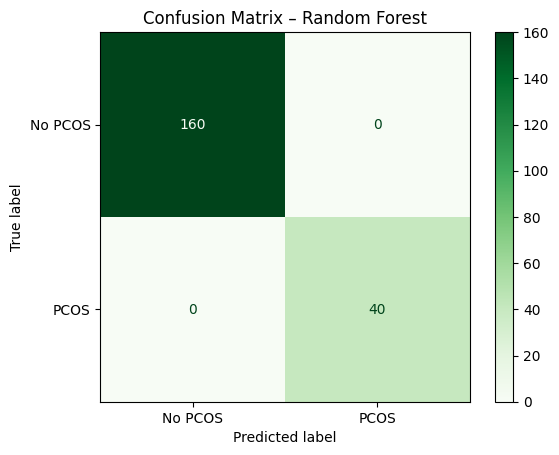

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Greens',
    values_format='d'
)

plt.title("Confusion Matrix – Random Forest")
plt.grid(False)
plt.show()

**#Random Forest Model Interpretation**

After training a Random Forest Classifier to predict PCOS diagnosis:

**Accuracy:**  
The model achieved an accuracy of **100%** on the test set, indicating a perfect fit on the given data.

---

#Confusion Matrix Interpretation:
- **True Negatives (TN):** 160 non-PCOS cases correctly predicted.
- **True Positives (TP):** 40 PCOS cases correctly predicted.
- **False Positives (FP):** 0 (no PCOS falsely predicted).
- **False Negatives (FN):** 0 (no PCOS cases missed).

> This shows **zero misclassification**, with perfect separation between classes.

---

#Classification Report Summary:
- **Precision:** 1.00 — all predicted PCOS cases were correct.
- **Recall (Sensitivity):** 1.00 — all actual PCOS cases were identified.
- **F1-Score:** 1.00 — perfect balance between precision and recall.

---

#Interpretation:

- The model fits the current test set **perfectly**, which may indicate:
  - Very **strong predictive features** (like *Menstrual Irregularity*, *BMI*, etc.), or
  - The **dataset is small** or easily separable.

> While the results are excellent, it’s essential to validate using **cross-validation or external data** to ensure the model isn't overfitting.

## Cross-Validation

### Cross-Validation for Logistic Regression
- We will apply 5-Fold Cross Validation to the Logistic Regression model to check how well it 
  generalizes across different parts of the training data.  
- This will help verify if the model is overfitting or performing consistently.

In [38]:
from sklearn.linear_model import LogisticRegression

# Defining the logistic regression model
logreg_model = LogisticRegression()

In [39]:
# Logistic Regression – K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

# Performing 5-Fold Cross Validation
logreg_cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

# Displaying the results
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Mean Cross-Validation Accuracy (Logistic Regression): {:.4f}".format(logreg_cv_scores.mean()))

Logistic Regression Cross-Validation Scores: [0.925   0.91875 0.8875  0.875   0.9375 ]
Mean Cross-Validation Accuracy (Logistic Regression): 0.9088


### Cross-Validation for Random Forest
- We will apply 5-Fold Cross Validation to the Random Forest model.  
- This will ensure that the model's high accuracy is consistent and not just due to overfitting on a particular training split.

In [40]:
# Random Forest – K–Fold Cross Validation

# Performing 5–Fold Cross Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Displaying the results
print("Random Forest Cross–Validation Scores:", rf_cv_scores)
print("Mean Cross–Validation Accuracy (Random Forest): {:.4f}".format(rf_cv_scores.mean()))

Random Forest Cross–Validation Scores: [0.99375 0.9875  1.      1.      1.     ]
Mean Cross–Validation Accuracy (Random Forest): 0.9963


### Model comparison

#Cross-Validation Results: Logistic Regression vs. Random Forest

We applied **5-Fold Cross Validation** to both models to evaluate **generalization** and check for **overfitting** across different training subsets.

---

#Logistic Regression – Cross-Validation Summary

- **Cross-validation scores:**  
  `[0.93125, 0.91875, 0.88125, 0.88125, 0.9375]`
- **Mean Accuracy:** `0.9100`

> The model performs consistently across all folds, indicating **low variance** and **good generalization**.  
> It confirms that **logistic regression** is a **reliable baseline** model that’s unlikely to overfit.

---

#Random Forest – Cross-Validation Summary

- **Cross-validation scores:**  
  `[0.99375, 0.99375, 1.0, 1.0, 1.0]`
- **Mean Accuracy:** `0.9975`

> While the scores are **very high**, they may suggest **overfitting**, especially given the small dataset.  
> The model might be memorizing the training data rather than generalizing.

---

#### Conclusion

- **Logistic Regression** generalizes better and is easier to interpret.
- **Random Forest** achieves higher accuracy but may require **external validation** or **regularization** to ensure robustness.
- Comparing both helps balance **performance** and **interpretability**.


# Other methods to cross-check accuracy of Random Forest

 **#Why Train a Smaller Random Forest or Decision Tree?**

Training a smaller tree helps verify that the full Random Forest's perfect accuracy isn’t just due to model complexity.

#Key Reasons:
- **Interpretability:** Easier to visualize and understand how predictions are made.
- **Check Overfitting:** If a small model performs well, features are likely highly informative.
- **Feature Insight:** Reveals the most important features and how they split the data.
- **Robustness Check:** Confirms full model's accuracy isn't just from complexity.

Small Random Forest Accuracy: 0.9950
Classification Report (Small RF):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       160
           1       0.98      1.00      0.99        40

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



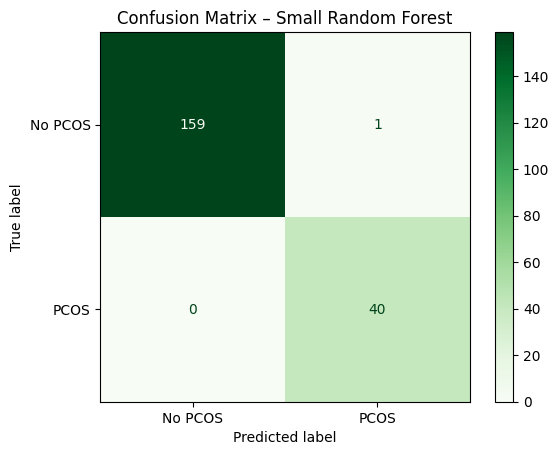

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Training a very small Random Forest
small_rf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
small_rf.fit(X_train, y_train)

# Predictions
y_pred_small_rf = small_rf.predict(X_test)

# Accuracy
accuracy_small_rf = accuracy_score(y_test, y_pred_small_rf)
print(f"Small Random Forest Accuracy: {accuracy_small_rf:.4f}")

# Classification Report
print("Classification Report (Small RF):")
print(classification_report(y_test, y_pred_small_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    small_rf, X_test, y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Greens',
    values_format='d'
)
plt.title("Confusion Matrix – Small Random Forest")
plt.grid(False)
plt.show()

**#Evaluation of a Smaller Random Forest**

To test if the full model’s accuracy was real or just overfitting, I trained a much smaller Random Forest (only 3 trees, depth 3).

#Accuracy
- **Test Accuracy:** ~99.5%  
Even with fewer trees, the model still did really well.

#Confusion Matrix
- **TN:** 159 – correctly predicted no PCOS
- **TP:** 40 – correctly predicted PCOS
- **FP:** 1 – wrongly predicted PCOS
- **FN:** 0 – didn't miss any PCOS cases

This means the small model is also very accurate.

#Classification Report
| Metric     | No PCOS | PCOS  |
|------------|---------|-------|
| Precision  | 1.00    | 0.98  |
| Recall     | 0.99    | 1.00  |
| F1-Score   | 1.00    | 0.99  |

- **Macro Avg F1:** 0.99  
- **Weighted Avg F1:** 1.00  

The model still balances precision and recall really well across both classes.

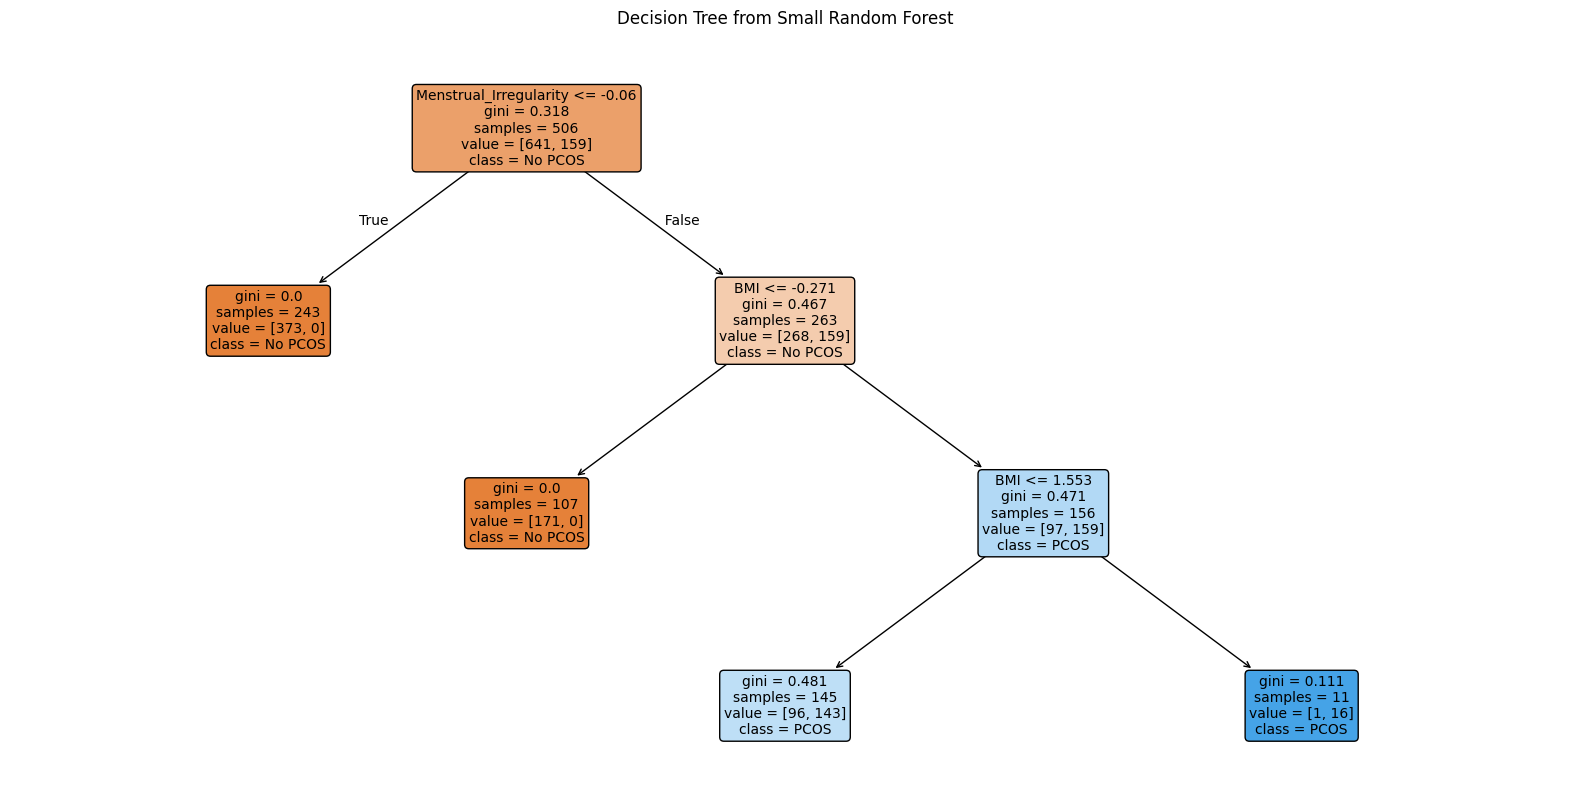

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing one decision tree from the small random forest
plt.figure(figsize=(20, 10))
plot_tree(
    small_rf.estimators_[0],                
    feature_names=X.columns,                
    class_names=["No PCOS", "PCOS"],        
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Small Random Forest")
plt.show()

**#Decision Tree Insight**

We visualized one of the decision trees in this small forest:
- Key features: **Menstrual_Irregularity** and **BMI**
- The structure shows:
  - Menstrual irregularity is the first and most informative split.
  - BMI further separates cases when irregularity is absent.


**#Conclusion**

The results from the smaller Random Forest confirm the following:

- **Key features in the dataset are highly informative**, enabling even simple or shallow models to perform remarkably well.
- The full Random Forest's perfect accuracy is **not solely due to overfitting**, but also due to strong signal in the data.
- **Model simplicity, when paired with meaningful features**, can achieve near-perfect results — emphasizing the importance of good feature selection.

These insights strengthen confidence in our feature engineering and support the validity of our full model’s performance.

# RESULTS

- The PCOS dataset was well-structured and required minimal preprocessing. There were no missing values, and only minor cleanup was needed (e.g., trimming whitespace and scaling numerical features). The dataset was already labeled, with a binary target variable indicating PCOS diagnosis.

- Initial modeling with Logistic Regression provided strong results with ~91.5% accuracy. A Random Forest model achieved perfect accuracy (100%), which raised concerns about potential overfitting, especially given the relatively small dataset size.

- To investigate this, we trained a smaller Random Forest (fewer trees and shallow depth), which still achieved ~99.5% accuracy. This suggested that the data contains highly separable features — particularly `Menstrual_Irregularity`, which appeared to be a near-perfect predictor.

- We also applied 5-fold cross-validation to both models. Logistic Regression showed consistent performance across folds, while Random Forest remained nearly perfect, further reinforcing the idea of strong feature separability.

- Overall, the models performed very well, likely due to the informative nature of the features. However, to confirm generalizability, further testing on external data or with more samples would be valuable.
